In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]
warnings.filterwarnings("ignore")

# Wczytanie danych

In [2]:
data = pd.read_excel('./Test_case1.xlsx')

# Podstawowe informacje o zbiorze

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165906 entries, 0 to 165905
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idcase                   165906 non-null  int64  
 1   txtprocess               165906 non-null  object 
 2   csd                      165906 non-null  object 
 3   txtfranchise             165906 non-null  object 
 4   txtdrugcode              165906 non-null  object 
 5   txtgeneric_name          165900 non-null  object 
 6   txtcountry_of_incidence  165906 non-null  object 
 7   txtfile_name             165906 non-null  object 
 8   txtmarrs_case_id         162274 non-null  object 
 9   txtreporttype            165906 non-null  object 
 10  weight                   165906 non-null  float64
 11  initial_follow_up        165873 non-null  object 
 12  userid_dmcs_imported     165906 non-null  object 
 13  date_dmcs_imported       165906 non-null  object 
 14  add_

In [4]:
data.head(5)

,idcase,txtprocess,csd,txtfranchise,txtdrugcode,txtgeneric_name,txtcountry_of_incidence,txtfile_name,txtmarrs_case_id,txtreporttype,...,date_dmcs_received,userid_coord_routed_by,userid_coord_routed_to,date_coord_routed,date_coord_received,userid_coord_processing,date_coord_processing,userid_coord_completed,date_coord_completed,txtstatus
0,14360,Intake,2017-06-01 00:00:00,Neurology and Ophthalmology,DrugCode1,GenericName1,CountryName1,FileName1,CaseId1,ReportType1,...,2017-07-07 08:00:00,User364,User54,2017-07-07 08:00:00,2017-07-07 08:00:00,User54,2017-07-07 12:48:00,User54,2017-07-07 12:48:00,2_COMPLETED
1,14370,Intake,01-AUG-17 12.00.00.000000000 AM,Cardiovascular,DrugCode2,GenericName2,CountryName2,FileName2,CaseId2,ReportType2,...,2017-07-07 08:00:00,User364,User445,2017-07-07 08:00:00,2017-07-07 08:00:00,User445,2017-07-07 12:48:00,User445,2017-07-07 12:48:00,2_COMPLETED
2,14371,Intake,01-AUG-17 12.00.00.000000000 AM,Oncology,DrugCode3,GenericName3,CountryName3,FileName2,CaseId3,ReportType3,...,2017-07-07 08:00:00,User364,User453,2017-07-07 08:00:00,2017-07-07 08:00:00,User453,2017-07-07 12:48:00,User453,2017-07-07 12:48:00,2_COMPLETED
3,14390,Intake,02-AUG-17 12.00.00.000000000 AM,Oncology,DrugCode3,GenericName3,CountryName3,FileName3,CaseId4,ReportType4,...,2017-07-07 08:00:00,User364,User280,2017-07-07 08:00:00,2017-07-07 08:00:00,User280,2017-07-07 12:48:00,User280,2017-07-07 12:48:00,2_COMPLETED
4,14411,Intake,02-JUN-17 12.00.00.000000000 AM,"Gastro, anti-inflammatory and pain",DrugCode4,GenericName4,CountryName4,FileName1,CaseId5,ReportType1,...,2017-07-07 08:00:00,User364,User55,2017-07-07 08:00:00,2017-07-07 08:00:00,User55,2017-07-07 12:48:00,User55,2017-07-07 12:48:00,2_COMPLETED


In [5]:
data.describe(percentiles=[.5])

,idcase,weight
count,1.659060e+05,165906.000000
mean,3.354658e+06,1.206834
std,9.768260e+05,0.326958
min,1.267100e+04,0.500000
50%,3.623320e+06,1.000000
max,3.842058e+06,2.500000


In [6]:
data.isnull().sum()

idcase                        0
txtprocess                    0
csd                           0
txtfranchise                  0
txtdrugcode                   0
txtgeneric_name               6
txtcountry_of_incidence       0
txtfile_name                  0
txtmarrs_case_id           3632
txtreporttype                 0
weight                        0
initial_follow_up            33
userid_dmcs_imported          0
date_dmcs_imported            0
add_reason                  740
date_dmcs_routed            971
userid_dmcs_routed            0
txtdmc                        2
date_dmcs_received          208
userid_coord_routed_by       77
userid_coord_routed_to       79
date_coord_routed            77
date_coord_received         379
userid_coord_processing     386
date_coord_processing       386
userid_coord_completed      841
date_coord_completed        839
txtstatus                     0
dtype: int64

In [7]:
data.isnull().sum().sum()

8656

Są tylko dwie kolumny numeryczne, cała reszta jest typu object. Jest trochę braków danych,ale nie jest to duża ilość w stosunku do ilości obserwacji.

# Zadanie 1

Rozpocznę od zamiany odpowiednich kolumn na typ datetime, aby móc w łatwy sposób obliczyć rożnicę dni.

In [8]:
data['date_coord_completed'] = pd.to_datetime(data['date_coord_completed'])
data['date_coord_received'] = pd.to_datetime(data['date_coord_received'])

In [9]:
data['difference'] = data['date_coord_completed'].sub(data['date_coord_received'], axis=0)
data['difference'].head(10)

0   04:48:00
1   04:48:00
2   04:48:00
3   04:48:00
4   04:48:00
5   04:48:00
6   04:48:00
7   04:48:00
8   04:48:00
9   04:48:00
Name: difference, dtype: timedelta64[ns]

In [10]:
data['difference'].value_counts()

0 days 07:40:48    530
0 days 08:00:00    324
0 days 04:48:00    237
0 days 05:16:48    155
0 days 00:00:16     73
                  ... 
5 days 02:14:53      1
2 days 00:59:37      1
0 days 07:28:23      1
0 days 08:43:22      1
0 days 04:31:53      1
Name: difference, Length: 41379, dtype: int64

Widzimy, iż najczęściej raporty były oddawane w okolicach 8 godzin od skończenia.

In [11]:
data['difference'] = data['difference']/np.timedelta64(1, 'h')

Warto zapisać kolumnę z czasami oddawania raportu, jako że przyda się do użytku później. Dodatkowo zapiszę ją w fornie godzin, jako że w ten sposób łatwiej ją czytać.

# Zadanie 2

In [12]:
missing = data[data['date_coord_completed'].isnull() | data['date_coord_received'].isnull()]
len(missing.index)

845

Daty rozpoczęcia, bądź ukończenia brakuje w 845 rekordach.

In [13]:
data['missing'] =  np.where(data['date_coord_completed'].isnull() | data['date_coord_received'].isnull(),0,1)
data['missing']

0         1
1         1
2         1
3         1
4         1
         ..
165901    0
165902    0
165903    0
165904    0
165905    0
Name: missing, Length: 165906, dtype: int64

W prosty sposób za pomocą funkcji z pakietu numpy tworzymy nową kolumnę w której mamy 0, tam gdzie brakuje rozpoczęcia, bądź ukończenia raportu oraz 1 w przeciwynym wypadku.

# Zadanie 3

In [14]:
data_nm = data.loc[data['missing'] == 1] #nm jako skrót od non missing

Najpierw wybieram te rekordy w których nie brakuje danych w kolumnie missing

In [15]:
data_nm['difference'].describe(percentiles=[.5])

count    165061.000000
mean          7.797456
std          29.146636
min         -12.934444
50%           2.268056
max        2739.195278
Name: difference, dtype: float64

Metoda describe w łatwy sposób udostępnia wszystkie statystyki o których mowa w zadaniu. Oczywiście mediana to drugi kwartyl. Jednoczęsnie widać, iż w danych mogą występować błędy, gdyż minimalna wartość różnicy czasu jest ujemna.

In [16]:
data_nm['txtreporttype'].value_counts()

ReportType2     48659
ReportType1     21120
ReportType3     18608
ReportType5     17630
ReportType11    16706
ReportType10    14883
ReportType9      7800
ReportType8      6457
ReportType4      5508
ReportType7      4653
ReportType6      2260
ReportType18      474
ReportType14      110
ReportType12       98
ReportType16       42
ReportType19       19
ReportType15       19
ReportType17        5
ReportType20        2
ReportType13        2
ReportType22        2
ReportType23        2
ReportType24        1
ReportType21        1
Name: txtreporttype, dtype: int64

Mamy kilkanaście typów raportów, jednocześnie dość znacząco różnią się one popularnością.

In [17]:
raport_data = data_nm[['txtreporttype','difference']]
raport_data.groupby('txtreporttype').describe(percentiles=[.5])

difference                                              \
                   count       mean        std        min        50%   
txtreporttype                                                          
ReportType1      21120.0  22.677656  58.135784  -5.106111   4.234583   
ReportType10     14883.0   6.518777  22.082435 -12.800000   2.038056   
ReportType11     16706.0   4.813013  27.158196 -10.228056   2.290000   
ReportType12        98.0  11.138399  39.776412  -8.083611   2.892500   
ReportType13         2.0   4.604028   0.721052   4.094167   4.604028   
ReportType14       110.0   9.320770  15.679194   0.006111   3.697778   
ReportType15        19.0  10.193158  10.399703   0.008611   7.195556   
ReportType16        42.0  13.067341  53.181865  -0.652500   2.256389   
ReportType17         5.0   5.293833   2.366210   2.729722   4.111111   
ReportType18       474.0   4.141089   8.114463   0.198611   2.788333   
ReportType19        19.0  15.199386  38.401789   0.218056   2.312222   
ReportType2      48659.0   5.032278  16.226858 -12.934444   1.658611   
ReportType20         2.0   3.678611   5.189771   0.008889   3.678611   
ReportType21         1.0  48.477778        NaN  48.477778  48.477778   
ReportType22         2.0   1.077361   0.415032   0.783889   1.077361   
ReportType23         2.0  10.514167   0.062461  10.470000  10.514167   
ReportType24         1.0   0.988889        NaN   0.988889   0.988889   
ReportType3      18608.0   4.774359  10.747293 -10.231667   2.361250   
ReportType4       5508.0   4.088019  11.498362  -7.497500   1.815694   
ReportType5      17630.0   6.323935  29.108441 -11.731111   2.428611   
ReportType6       2260.0   4.037537  13.694973  -9.836111   2.026389   
ReportType7       4653.0  15.254259  36.951719   0.003889   3.837500   
ReportType8       6457.0   5.049481  25.543010 -11.217500   2.279167   
ReportType9       7800.0   5.773058  13.436976  -9.305278   3.277778   

                            
                       max  
txtreporttype               
ReportType1    1006.786944  
ReportType10    579.849722  
ReportType11   2739.195278  
ReportType12    319.391111  
ReportType13      5.113889  
ReportType14    125.416389  
ReportType15     29.563611  
ReportType16    344.687500  
ReportType17      8.238333  
ReportType18    120.567222  
ReportType19    169.493333  
ReportType2     532.215556  
ReportType20      7.348333  
ReportType21     48.477778  
ReportType22      1.370833  
ReportType23     10.558333  
ReportType24      0.988889  
ReportType3     531.845556  
ReportType4     295.109444  
ReportType5    1658.680833  
ReportType6     389.108889  
ReportType7     481.945278  
ReportType8     703.392222  
ReportType9     795.349444

Zbiorowa ramka dla wszystkich typów w zwięzły sposób przedstawia wszystkie statystyki opisowe, które chcieliśmy zobaczyć, a nawet trochę więcej, bo mamy do dyspozycji też liczność, minimum oraz maximum.

In [18]:
mask = (data_nm['date_coord_completed'] >'2017-11-01') & (data_nm['date_coord_completed'] <= '2017-11-30')
data_nov = data_nm.loc[mask]
data_nov = data_nov.loc[data['txtreporttype']=='ReportType4']
data_nov.describe()['difference']

count    444.000000
mean       4.407719
std        9.964201
min        0.025556
25%        0.969583
50%        2.102222
75%        4.481667
max      120.688333
Name: difference, dtype: float64

W ostatniej części tego zadania, najpierw wybieram rekordy z odpowiedniego przedziału czasowego, a następnie odpowiedni typ raportu, tak jak w poleceniu.

# Zadanie 4

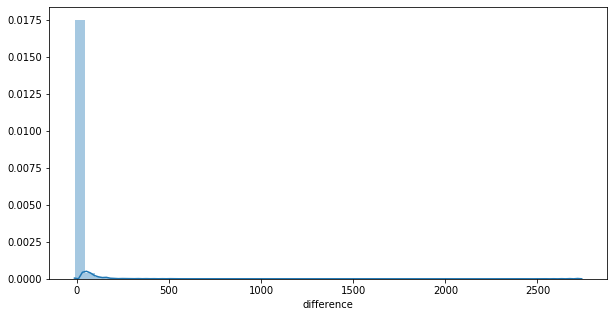

In [19]:
sns.distplot(data['difference'])

Na podstawie tego rysunku ciężko stwierdzić jaki rozkład ma ta zmienna. Spróbuję przyciąć parę obserwacji odstających, aby złapać lepszy obraz rozkładu.

In [20]:
dist = data_nm['difference']
dist = dist[dist<750]
data_nm['difference'].shape[0] - dist.shape[0]

12

Zaledwie 12 obserwacji ma czas wykonania większy niż 500 godzin.

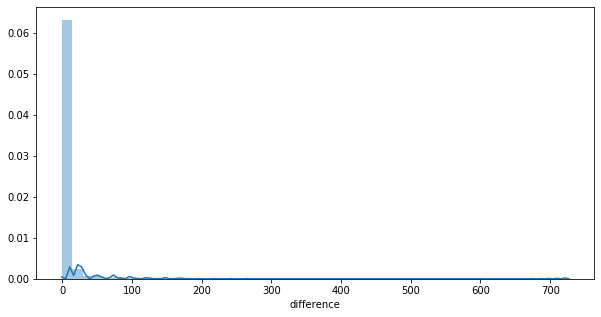

In [21]:
dist = dist[dist>0]
sns.distplot(dist)

W dalszym ciągu ciężko o jednoznaczną identyfikację, aczkolwiek rozkład przypomina wykładniczy.

In [58]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme",'expon']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    return best_dist, best_p, params[best_dist]
get_best_distribution(dist)

p value for norm = 0.0
p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 0.0
p value for genextreme = 1.8048264694587818e-91
p value for expon = 0.0


('genextreme',
 1.8048264694587818e-91,
 (-0.8318668170344832, 1.5152350354380881, 1.67678296347846))

Wszystkie wartości p-value w teście Kołmogorowa-Smirnova wyszly praktycznie zerowe, w związku z tym moja teza dalej jest niepotwierdzona, aczkolwiek myślę, iż po odpowiednim dopasowaniu parametrów, byłoby możliwe poprawienie wyników, zwłaszcza dla wcześniej wspomnianego rozkładu wykładniczego.

# Zadanie 5

Jako datę wykonania zgłoszenia rozumiem kolumnę 'date_coord_completed'.

In [23]:
data['dmcs_month'] = data['date_coord_completed'].dt.month

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

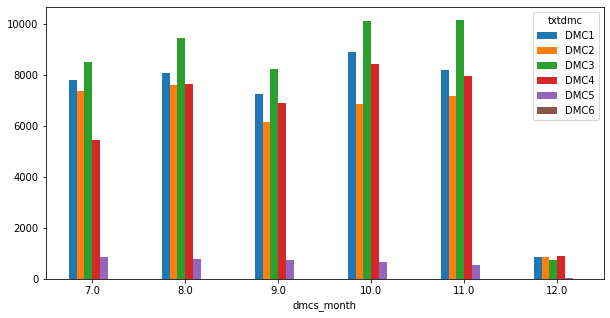

In [26]:
plot_data = data[['dmcs_month','txtdmc']]
plot_data.groupby(['txtdmc','dmcs_month']).agg(len).unstack(0).plot.bar()
plt.xticks(rotation=0)

Najpierw dobieram sobie odpowiednie kolumny oraz na ich podstawie tworzę wykres.

# Zadanie 6

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

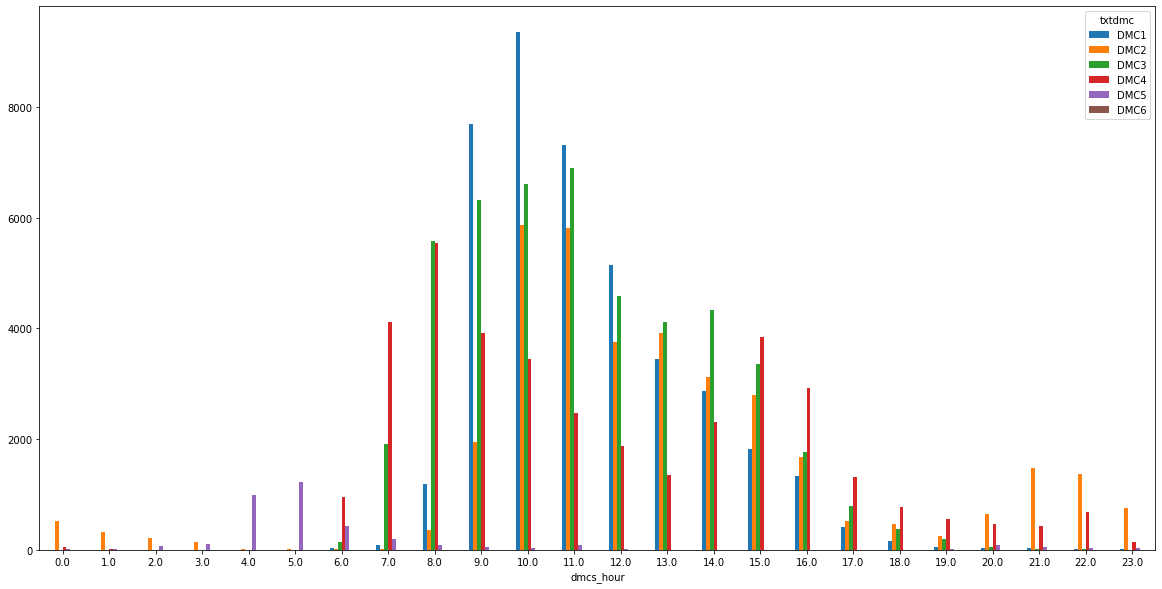

In [44]:
plt.rcParams["figure.figsize"] = [20, 10]
data['dmcs_hour'] = data['date_coord_completed'].dt.hour
plot_data = data[['dmcs_hour','txtdmc']]
plot_data.groupby(['txtdmc','dmcs_hour']).agg(len).unstack(0).plot.bar()
plt.xticks(rotation=0)

Postępujemy bardzo analogicznie jak w poprzednim punkcie, tylko że zamiast miesiąca wybieramy godziny.

# Zadanie 7

In [41]:
top = data['userid_coord_completed'].value_counts().sort_values(ascending=False).head(5)
top 

User82     1231
User424    1085
User359    1044
User122    1000
User380     960
Name: userid_coord_completed, dtype: int64

Wybieramy najcześciej występujących użytkowników za pomocą metody value counts, a następnie metody head, która zwraca topowe wyniki.

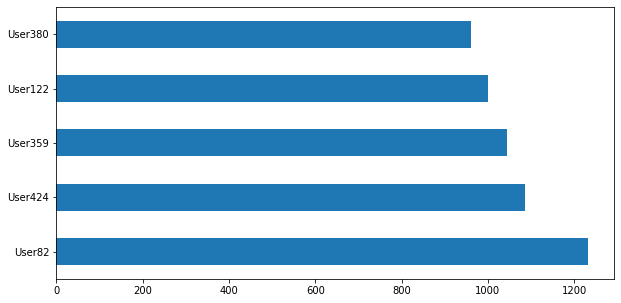

In [38]:
plt.rcParams["figure.figsize"] = [10, 5]
top.plot(kind='barh')

# Zadanie 8

In [31]:
ended = data[['txtstatus','txtdmc']]
ended = data.loc[data['txtstatus'] == '2_COMPLETED']

Działamy podobnie jak w poprzednim punkcie, z tą różnicą że wybieramy najpierw tylko ukończone zgłoszenia, aby móc je potem pogrupować po oddziale.

In [42]:
ended_perc = ended.groupby('txtdmc').txtstatus.agg(len)/len(ended)
ended_perc = ended_perc.sort_values(ascending=False)
ended_perc

txtdmc
DMC3    0.285510
DMC1    0.248604
DMC4    0.225619
DMC2    0.218373
DMC5    0.021840
DMC6    0.000055
Name: txtstatus, dtype: float64

Dzielimy całościową ilośc danych na oddział przez sumę wszystkich i w ten sposób otrzymujemy ładnie procentowe wyniki.

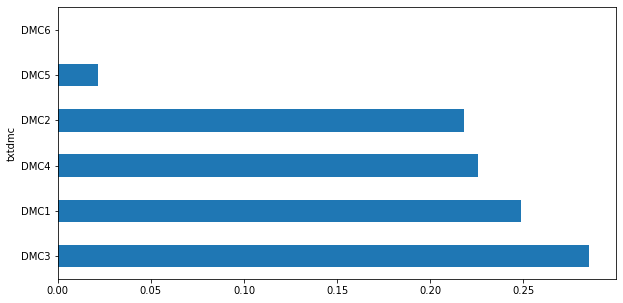

In [43]:
ended_perc.plot(kind='barh')